# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 120.3 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.7
    Uninstalling spacy-3.8.7:
      Successfully uninstalled spacy-3.8.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 23.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip'

## Importing the necessary libraries

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the first file - True.csv
true = pd.read_csv('/content/drive/MyDrive/ML_NLP_PROJECT/True.csv')
# Import the second file - Fake.csv
fake = pd.read_csv('/content/drive/MyDrive/ML_NLP_PROJECT/Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [ ]:
# Inspect the DataFrame with True News to understand the given data
true.head()

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [ ]:
# Inspect the DataFrame with Fake News to understand the given data
fake.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [ ]:
# Print the column details for True News DataFrame
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [ ]:
# Print the column details for Fake News Dataframe
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [ ]:
# Print the column names of both DataFrames
print("Column names for True",true.columns)
print("Column names for Fake",fake.columns)

Column names for True Index(['title', 'text', 'date'], dtype='object')
Column names for Fake Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [ ]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake['news_label'] = 0

In [ ]:
print("Column names for True",true.columns)
print("Column names for Fake",fake.columns)

Column names for True Index(['title', 'text', 'date', 'news_label'], dtype='object')
Column names for Fake Index(['title', 'text', 'date', 'news_label'], dtype='object')


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [ ]:
# Combine the true and fake news DataFrames into a single DataFrame
merged_news = pd.concat([true, fake], axis=0)

In [ ]:
# Display the first 5 rows of the combined DataFrame to verify the result
merged_news.sample(n=5)

,title,text,date,news_label
9771,Email privacy bill unanimously passes U.S. House,WASHINGTON (Reuters) - The U.S. House of Repre...,"April 27, 2016",1
1144,Workers At Ivanka Trump’s Clothing Factory Cl...,"Workers at PT Buma, the Korean-owned garment f...","June 14, 2017",0
6768,The NRA Just Got Caught In A Lie That Shatter...,Who can forget how emotional Wayne LaPierre wa...,"April 22, 2016",0
11665,U.S. approves license for Ukraine to buy small...,WASHINGTON (Reuters) - The U.S. State Departme...,"December 21, 2017",1
6638,Millennial And Latino Disgust With Republican...,Say what you want about the GOP but they reall...,"April 29, 2016",0


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [ ]:
# Check Presence of Null Values
print(merged_news.isnull().sum())

title         21
text          21
date          42
news_label     0
dtype: int64


In [ ]:
# Handle Rows with Null Values
#Keeping the row atleast 2 non null values present in a row
merged_cleaned = merged_news.dropna(subset=['date', 'title', 'text'], thresh=2)

In [ ]:
print(merged_cleaned.isnull().sum())

title          0
text           0
date          21
news_label     0
dtype: int64


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [ ]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
merged_cleaned["news_text"] = merged_cleaned["title"]+ " " + merged_cleaned["text"]
# Drop the irrelevant columns from the DataFrame as they are no longer needed
merged_cleaned = merged_cleaned[["news_text", "news_label"]]
# Display the first 5 rows of the updated DataFrame to check the result
merged_cleaned.head()

,news_text,news_label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [ ]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
# Add 'news_label' column to the new dataframe for topic identification
df_clean["news_label"] = merged_cleaned["news_label"]

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers

import re
import string

def clean_text(text):
    text = text.lower() #Lower case
    text = re.sub(r'\[.*?\]', '', text) # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text) # Remove words with numbers

    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [ ]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean["cleaned_text"] = merged_cleaned["news_text"].apply(clean_text)

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
import spacy
from nltk.corpus import stopwords
from tqdm.notebook import tqdm

# Load spacy model
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def pos_tag_lemmatize(texts):
    lemmatized_texts = []

    # Batch processing using spaCy's pipe
    for doc in tqdm(nlp.pipe(texts, batch_size=50, n_process=1), total=len(texts)):
        tokens = []
        for token in doc:
            if (token.tag_ in ['NN', 'NNS']) and (token.text.lower() not in stop_words) and (token.is_alpha):
                tokens.append(token.lemma_.lower())
        lemmatized_texts.append(" ".join(tokens))

    return lemmatized_texts

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = pos_tag_lemmatize(df_clean['cleaned_text'].tolist())

  0%|          | 0/44919 [00:00<?, ?it/s]

### Save the Cleaned data as a csv file (Recommended)

In [ ]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)


In [ ]:
df_clean = pd.read_csv("clean_df.csv")

In [ ]:
# Check the first few rows of the DataFrame
df_clean.head()

,news_label,cleaned_text,lemmatized_text
0,1,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...
1,1,us military to accept transgender recruits on ...,military transgender recruit people time milit...
2,1,senior us republican senator let mr mueller do...,mueller job counsel investigation link electio...
3,1,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...
4,1,trump wants postal service to charge much more...,trump service service ship package amzno fight...


In [ ]:
# Check the dimensions of the DataFrame
df_clean.shape

(44919, 3)

In [ ]:
# Check the number of non-null entries and data types of each column
print(df_clean.isnull().sum())

news_label          0
cleaned_text        0
lemmatized_text    16
dtype: int64


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [ ]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(df_clean, test_size=0.3, random_state=42)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [ ]:
# Add a new column to calculate the character length of cleaned news text
train_data['cleaned_text_length'] = train_data['cleaned_text'].apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_data['lemmatized_text_length'] = train_data['lemmatized_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

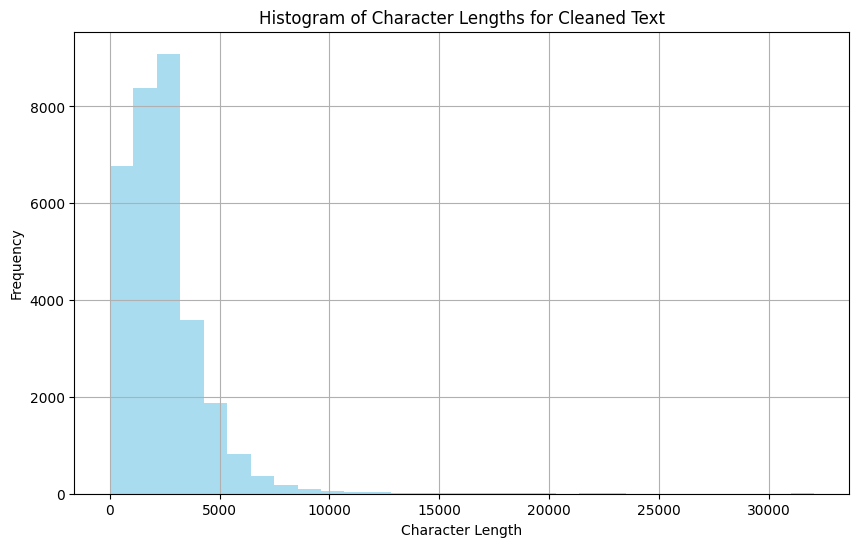

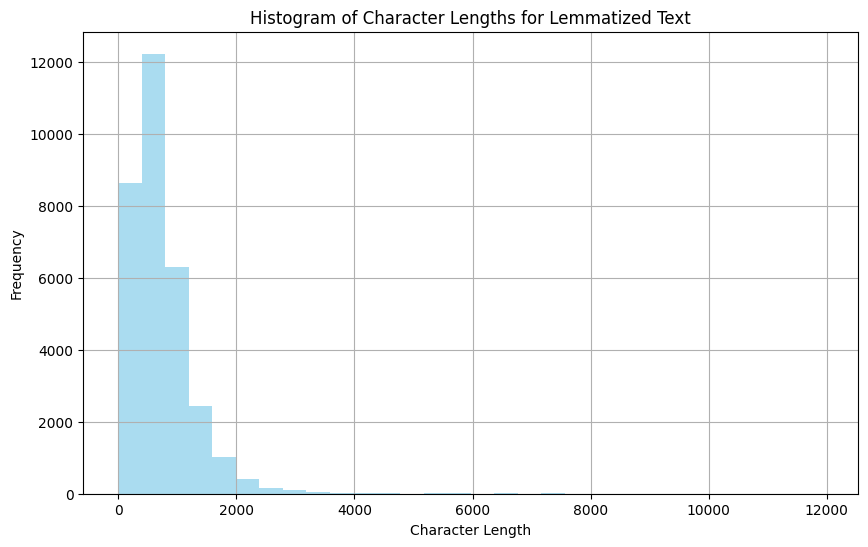

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text
plt.figure(figsize=(10, 6))
plt.hist(train_data['cleaned_text_length'], bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Character Lengths for Cleaned Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(10, 6))
plt.hist(train_data['lemmatized_text_length'], bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Character Lengths for Lemmatized Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

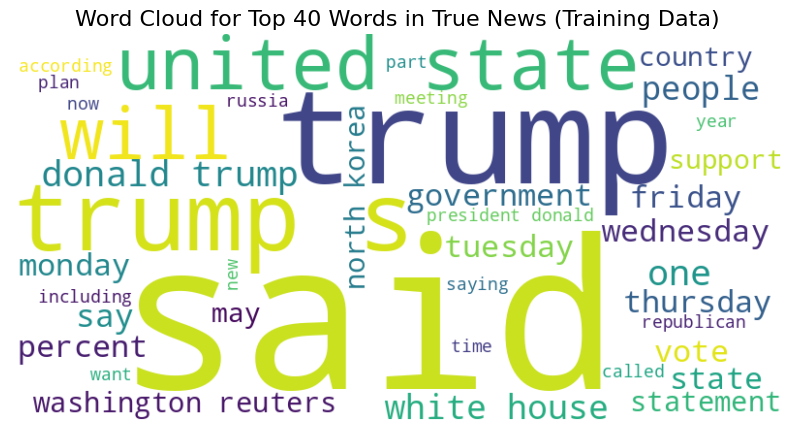

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_data = train_data[train_data['news_label'] == 1]
text = ' '.join(true_news_data['cleaned_text'].dropna().astype(str))

# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 40 Words in True News (Training Data)', fontsize=16)
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

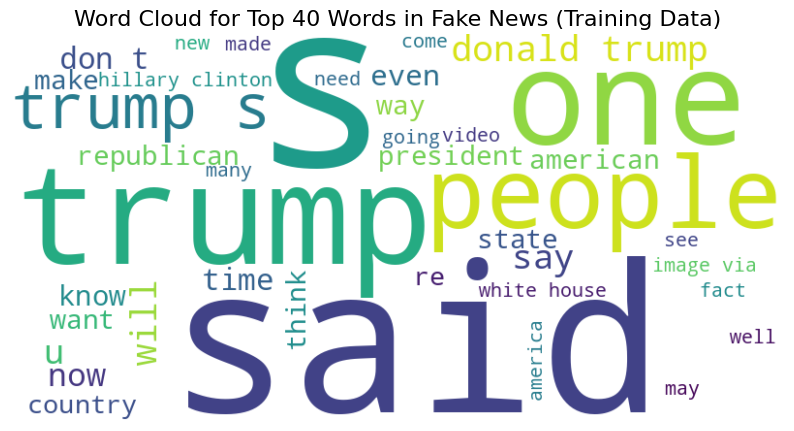

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
fake_news_data = train_data[train_data['news_label'] == 0]
text = ' '.join(fake_news_data['cleaned_text'].dropna().astype(str))
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(text)
# Generate word cloud for Fake News
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 40 Words in Fake News (Training Data)', fontsize=16)
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write a function to get the specified top n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), n=10):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:n], columns=['ngram', 'frequency'])

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [ ]:
# Handle NaN values in the text data
train_data['cleaned_text'] = train_data['cleaned_text'].fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
         ngram  frequency
0        said      68654
1       trump      40646
2     reuters      19752
3   president      18740
4       state      14054
5  government      13040
6       house      12430
7         new      12405
8      states      11849
9  republican      11110


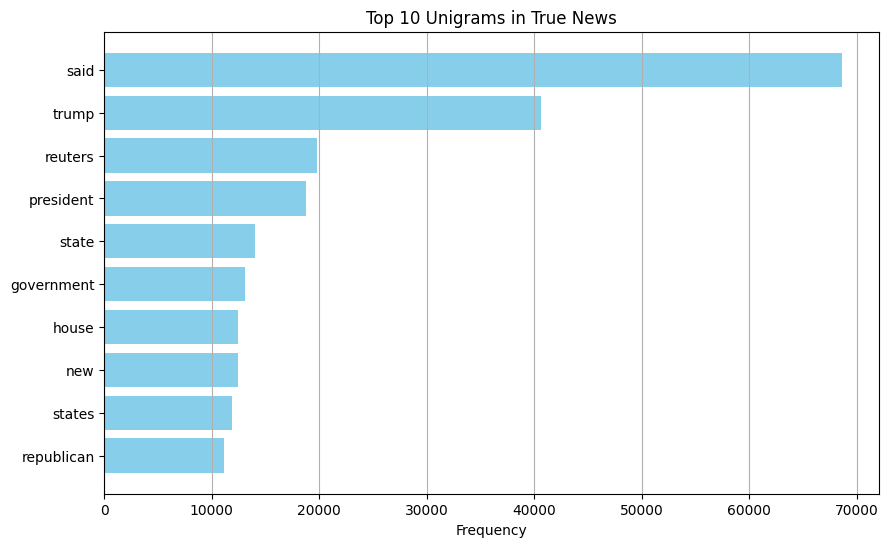

In [ ]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
true_news = train_data[train_data['news_label'] == 1]['cleaned_text']
true_unigrams = get_top_ngrams(true_news, ngram_range=(1,1), n=10)
print("Top 10 Unigrams in True News:\n", true_unigrams)
plt.figure(figsize=(10,6))
plt.barh(true_unigrams['ngram'], true_unigrams['frequency'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Unigrams in True News", fontsize=12)
plt.xlabel('Frequency')
plt.grid(axis='x')
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
                 ngram  frequency
0       united states       8539
1        donald trump       7064
2         white house       6268
3  washington reuters       4533
4         north korea       4412
5    president donald       4098
6            new york       3137
7      prime minister       2945
8      said statement       2771
9          trump said       2525


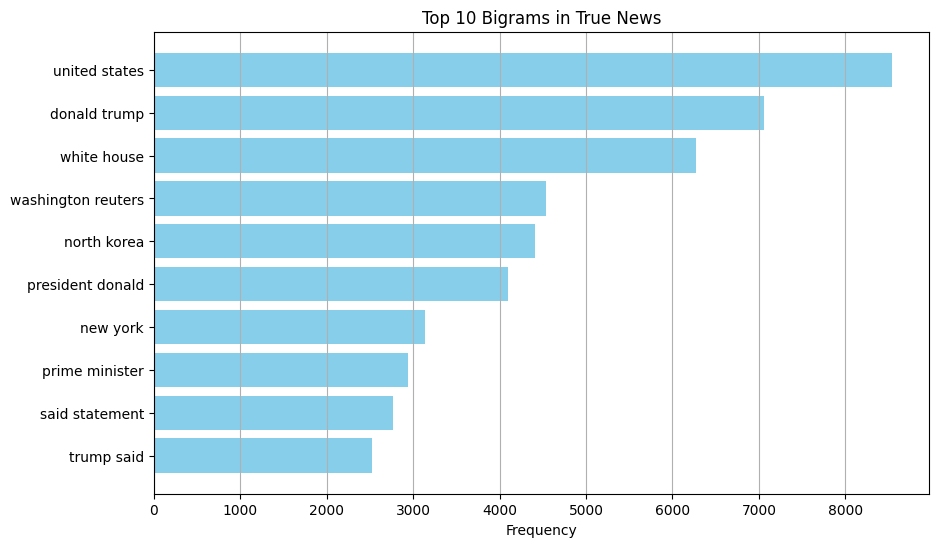

In [ ]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
true_bigrams = get_top_ngrams(true_news, ngram_range=(2,2), n=10)
print("Top 10 Bigrams in True News:\n", true_bigrams)
plt.figure(figsize=(10,6))
plt.barh(true_bigrams['ngram'], true_bigrams['frequency'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Bigrams in True News", fontsize=12)
plt.xlabel('Frequency')
plt.grid(axis='x')
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
                           ngram  frequency
0        president donald trump       4054
1        president barack obama       2011
2      reuters president donald       1090
3  washington reuters president        952
4              white house said        641
5   presidentelect donald trump        570
6      president vladimir putin        528
7              new york reuters        512
8           state rex tillerson        466
9           secretary state rex        465


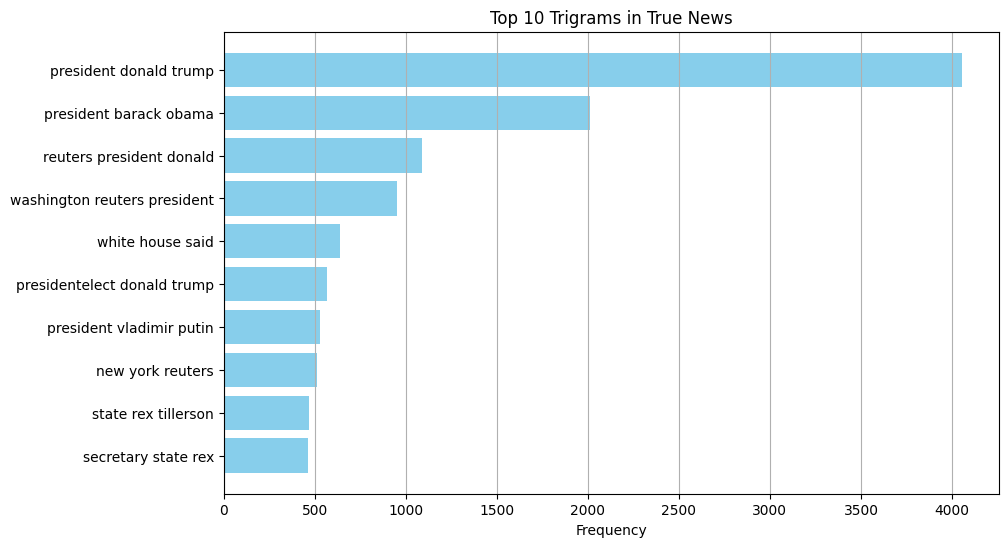

In [ ]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
true_trigrams = get_top_ngrams(true_news, ngram_range=(3,3), n=10)
print("Top 10 Trigrams in True News:\n", true_trigrams)
plt.figure(figsize=(10,6))
plt.barh(true_trigrams['ngram'], true_trigrams['frequency'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Trigrams in True News", fontsize=12)
plt.xlabel('Frequency')
plt.grid(axis='x')
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in False News:
        ngram  frequency
0      trump      58068
1       said      21837
2  president      18639
3     people      18585
4       just      15128
5      obama      14152
6    clinton      13530
7     donald      12811
8       like      12582
9    hillary      11306


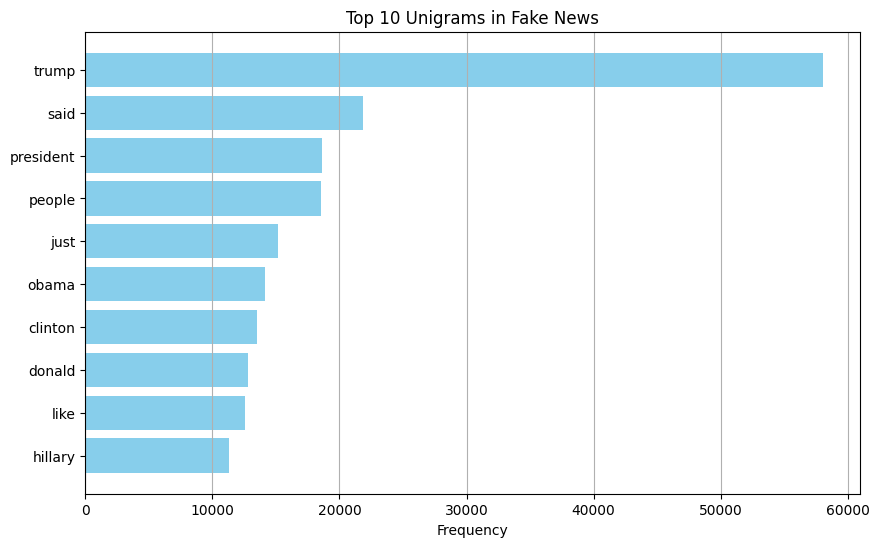

In [ ]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
fake_news = train_data[train_data['news_label'] == 0]['cleaned_text']
fake_unigrams = get_top_ngrams(fake_news, ngram_range=(1,1), n=10)
print("Top 10 Unigrams in False News:\n", fake_unigrams)
plt.figure(figsize=(10,6))
plt.barh(fake_unigrams['ngram'], fake_unigrams['frequency'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Unigrams in Fake News", fontsize=12)
plt.xlabel('Frequency')
plt.grid(axis='x')
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
              ngram  frequency
0     donald trump      11392
1  hillary clinton       5087
2      white house       4693
3    united states       4358
4         new york       3038
5  president trump       2898
6  president obama       2781
7         fox news       2486
8     barack obama       1607
9    supreme court       1383


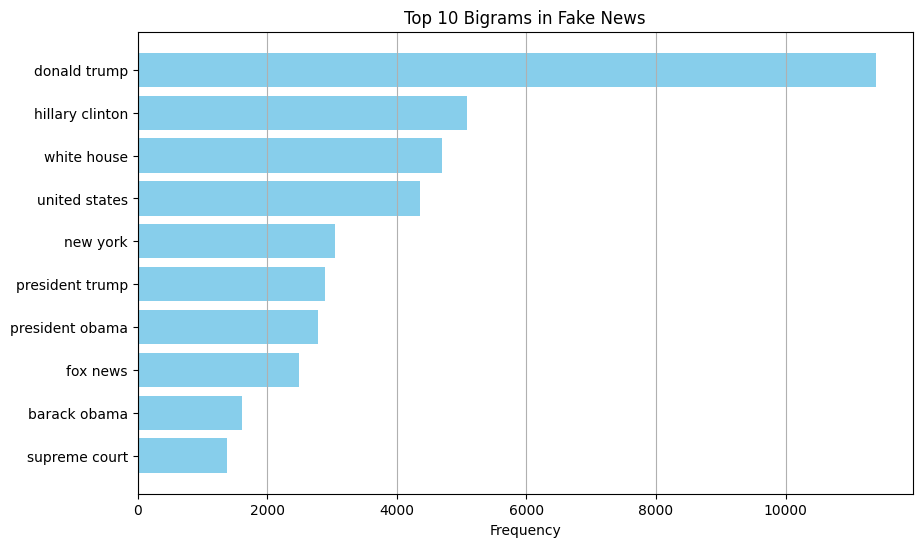

In [ ]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
fake_bigrams = get_top_ngrams(fake_news, ngram_range=(2,2), n=10)
print("Top 10 Bigrams in Fake News:\n", fake_bigrams)
plt.figure(figsize=(10,6))
plt.barh(fake_bigrams['ngram'], fake_bigrams['frequency'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Bigrams in Fake News", fontsize=12)
plt.xlabel('Frequency')
plt.grid(axis='x')
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
                           ngram  frequency
0  donald trump realdonaldtrump       1250
1                new york times       1112
2            black lives matter        989
3        president donald trump        676
4       president united states        655
5             news century wire        653
6        president barack obama        600
7          video screen capture        508
8             century wire says        503
9            image video screen        493


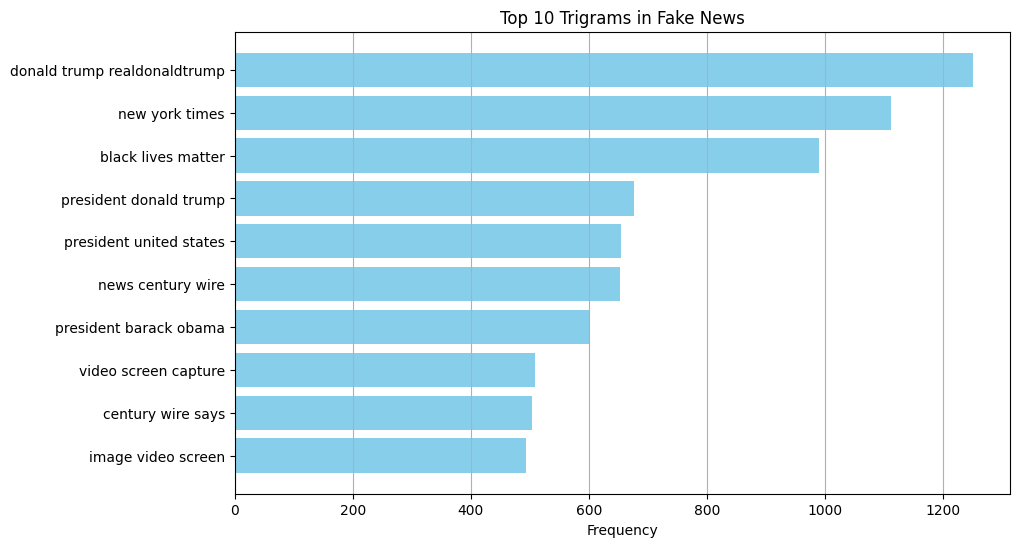

In [ ]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
fake_trigrams = get_top_ngrams(fake_news, ngram_range=(3,3), n=10)
print("Top 10 Trigrams in Fake News:\n", fake_trigrams)
plt.figure(figsize=(10,6))
plt.barh(fake_trigrams['ngram'], fake_trigrams['frequency'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Trigrams in Fake News", fontsize=12)
plt.xlabel('Frequency')
plt.grid(axis='x')
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
!pip install gensim
import gensim.downloader as api
from gensim.models import KeyedVectors
print("Downloading Word2Vec model")
word2vec_model = api.load("word2vec-google-news-300")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 77.5 MB/s eta 0:00:00
[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [72]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def doc_vector(text):
    words = text.split()
    word_vectors = []
    for word in words:
        if word in word2vec_model:
            word_vectors.append(word2vec_model[word])
    if len(word_vectors) == 0:
        return np.zeros(300)  # if no word is found, return a zero vector
    else:
        return np.mean(word_vectors, axis=0)

X_train_vectors = np.vstack(train_data['cleaned_text'].apply(doc_vector))
X_val_vectors = np.vstack(val_data['cleaned_text'].apply(doc_vector))

## Extract the target variable for the training data and validation data
y_train = train_data['news_label']
y_val = val_data['news_label']

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [74]:
## Initialise Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
## Train Logistic Regression model on training data
log_reg.fit(X_train_vectors, y_train)
## Predict on validation data
y_pred = log_reg.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [75]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_log_reg = accuracy_score(y_val, y_pred)
precision_log_reg = precision_score(y_val, y_pred)
recall_log_reg = recall_score(y_val, y_pred)
f1_log_reg = f1_score(y_val, y_pred)

print("\n Logistic Regression Metrics for Val Data ---")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")


 Logistic Regression Metrics for Val Data ---
Accuracy: 0.9584
Precision: 0.9504
Recall: 0.9641
F1-Score: 0.9572


In [76]:
# Classification Report
print("\nClassification Report for Logistic Regression:\n")
print(classification_report(y_val, y_pred))


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      6978
           1       0.95      0.96      0.96      6498

    accuracy                           0.96     13476
   macro avg       0.96      0.96      0.96     13476
weighted avg       0.96      0.96      0.96     13476



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [77]:
## Initialise Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
## Train Decision Tree model on training data
dt_model.fit(X_train_vectors, y_train)
## Predict on validation data
dt_preds = dt_model.predict(X_val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [78]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_dt = accuracy_score(y_val, dt_preds)
precision_dt = precision_score(y_val, dt_preds, average='weighted')
recall_dt = recall_score(y_val, dt_preds, average='weighted')
f1_dt = f1_score(y_val, dt_preds, average='weighted')

print("\n Decision Tree Performance")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")


 Decision Tree Performance
Accuracy: 0.8983
Precision: 0.8985
Recall: 0.8983
F1 Score: 0.8983


In [79]:
# Classification Report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_val, dt_preds))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6978
           1       0.91      0.88      0.89      6498

    accuracy                           0.90     13476
   macro avg       0.90      0.90      0.90     13476
weighted avg       0.90      0.90      0.90     13476



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [80]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(random_state=42)
## Train Random Forest model on training data
rf_model.fit(X_train_vectors, y_train)
## Predict on validation data
rf_preds = rf_model.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [81]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy_rf = accuracy_score(y_val, rf_preds)
precision_rf = precision_score(y_val, rf_preds, average='weighted')
recall_rf = recall_score(y_val, rf_preds, average='weighted')
f1_rf = f1_score(y_val, rf_preds, average='weighted')

print("\n Random Forest Performance")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


 Random Forest Performance
Accuracy: 0.9576
Precision: 0.9576
Recall: 0.9576
F1 Score: 0.9576


In [82]:
# Classification Report
print("\nClassification Report for Random Forest")
print(classification_report(y_val, rf_preds))


Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6978
           1       0.96      0.95      0.96      6498

    accuracy                           0.96     13476
   macro avg       0.96      0.96      0.96     13476
weighted avg       0.96      0.96      0.96     13476



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

Semamtic Analysis helped to better grasp the inner meaning and patterns beyond just keyword detection

Multiple Models like Random Forest , Logistic Regression , Decision Tree was used for this activity

Random Forest and Logistic regression could give accuracy around 96 percent.
But the accuracy for Decision Tree was on lower side

However Random Forest was chosen as the best model.
Random Forest was prefered for its flexibilty and slightly better consistency across all classes

**Assesment Conclusion**

1) The Approach acheived 96 percent accuracy in Detecting Fake news which is a good number

2) Random Forest helped minimized the risk of overfitting

3) F1-score ensured model is not biased towards one class

4) Implementation of this model helped in detecting Fake news early
